<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Insurance_Billing_by_carrier_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Billing Amount by Insurance Provider:
Insurance Provider
Medicare            25615.990508
Blue Cross          25613.011503
Aetna               25553.294506
Cigna               25525.766314
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64


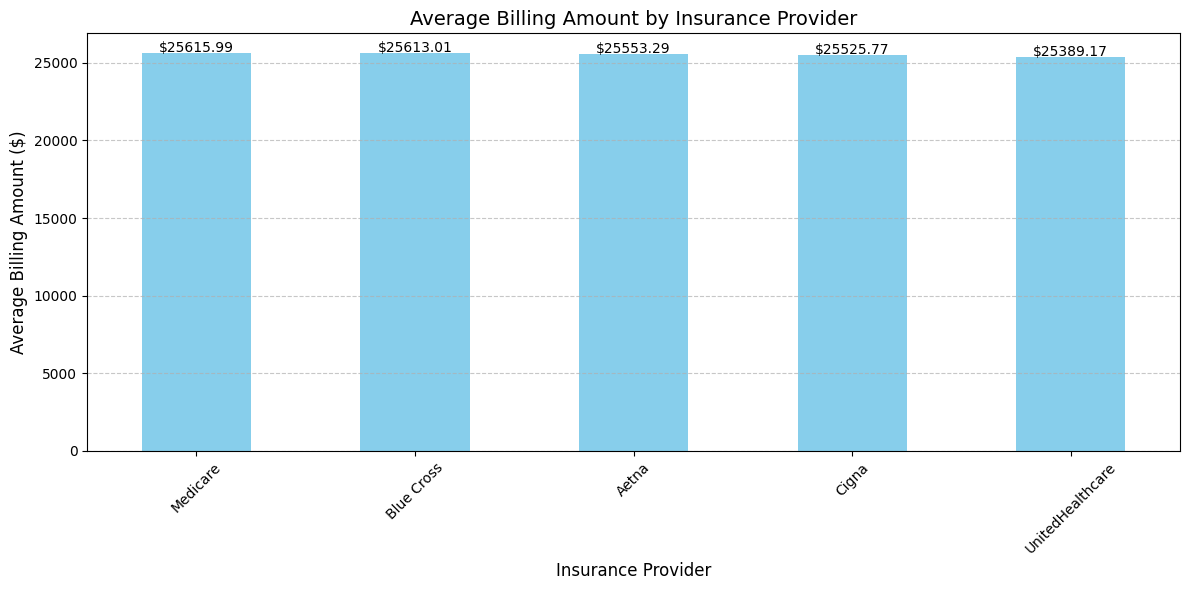

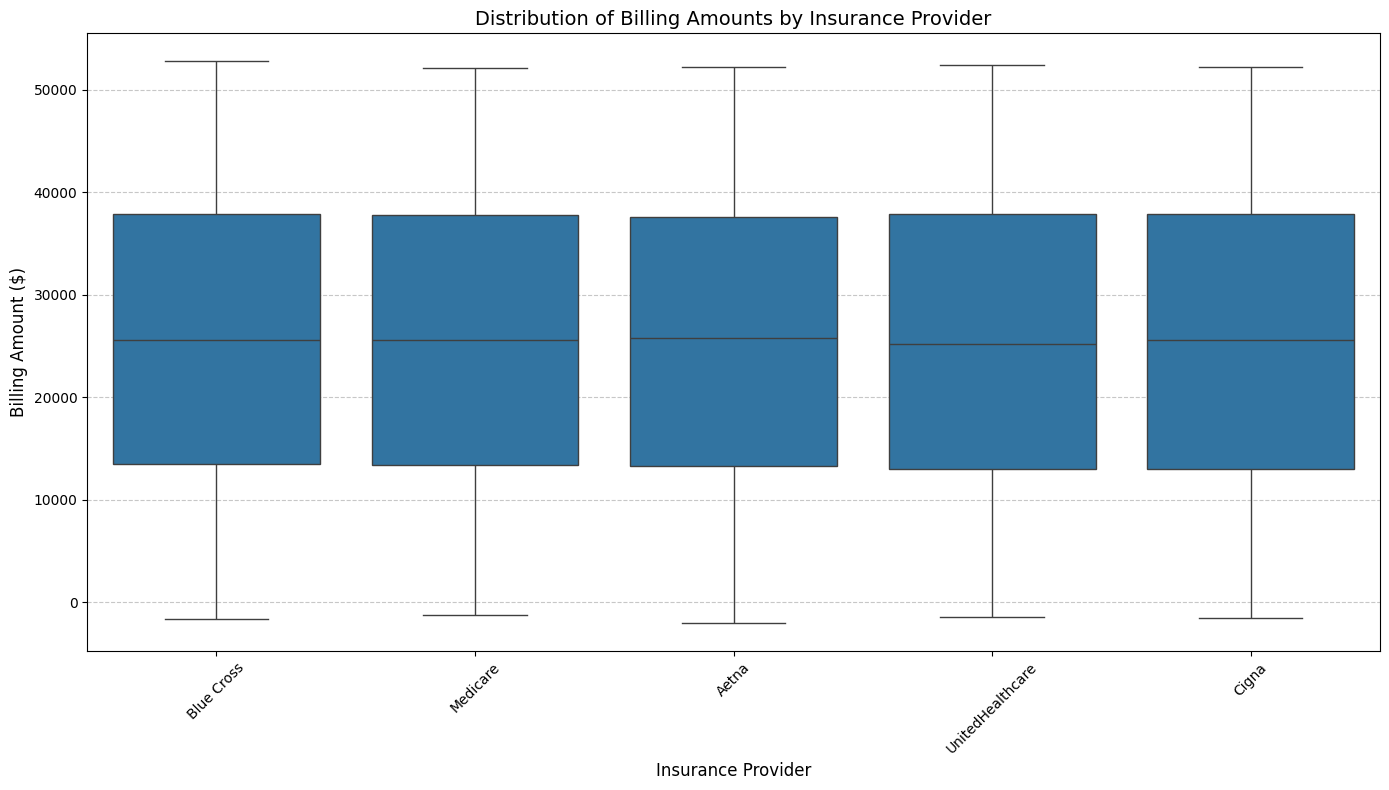

F_onewayResult(statistic=np.float64(0.47113386343271246), pvalue=np.float64(0.7569848941979609))


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway

avg_billing_by_provider = Insurance_Billing.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)

# Display the results
print("Average Billing Amount by Insurance Provider:")
print(avg_billing_by_provider)

# Visualize the results
plt.figure(figsize=(12, 6))
ax = avg_billing_by_provider.plot(kind='bar', color='skyblue')
plt.title('Average Billing Amount by Insurance Provider', fontsize=14)
plt.xlabel('Insurance Provider', fontsize=12)
plt.ylabel('Average Billing Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(avg_billing_by_provider):
    ax.text(i, v + 50, f'${v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
#Most bill on average of 25k per patient (without coverage measures)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=Insurance_Billing)
plt.title('Distribution of Billing Amounts by Insurance Provider', fontsize=14)
plt.xlabel('Insurance Provider', fontsize=12)
plt.ylabel('Billing Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#Normal Distribution shows that there most likely an equal risk pool/mostly unhealthy pool, which can have costs decreased.....(depending on multiple systemic factors)
#ANOVA test
ANOVA = stats.f_oneway(Insurance_Billing[Insurance_Billing['Insurance Provider']=='Aetna']['Billing Amount'],
                 Insurance_Billing[Insurance_Billing['Insurance Provider']=='Blue Cross']['Billing Amount'],
                 Insurance_Billing[Insurance_Billing['Insurance Provider']=='Cigna']['Billing Amount'],
                 Insurance_Billing[Insurance_Billing['Insurance Provider']=='UnitedHealthcare']['Billing Amount'],
                 Insurance_Billing[Insurance_Billing['Insurance Provider']=='Medicare']['Billing Amount'])
print(ANOVA)
#the indicated pvalue is well over .05; therefore no insurance providers in the sample vary by average billing amounts from each other
#it is important to mention that this is before any coverage measures are taken into account
#this is a possible hypothesis for further research
#costs still remain high, possibly due to systemic factors such as lack of preventative care, lack of access to care, and lack of education on health, etc.
#another possible area for research is which measures of systemic improvement would be most effective in reducing costs
